# Project: Bank Marketing Analysis
## Name: Marvis Eke
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Section I: Introduction

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Dataset**: [No-show appointments](https://archive.ics.uci.edu/dataset/222/bank+marketing)

**Description**: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Dataset Description

**Columns Description**

* age: Customer's age (numeric)

* job: Type of job (categorical)

* marital: Marital status (categorical)

* education: Education level (categorical)

* default: Has credit in default? (binary: 'yes', 'no')

* balance: Average yearly balance in euros (numeric)

* housing: Has a housing loan? (binary: 'yes', 'no')

* loan: Has a personal loan? (binary: 'yes', 'no')

* contact: Contact communication type (categorical)

* day_of_week: Last contact day of the week (categorical)

* duration: Last contact duration, in seconds (numeric)

* campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)

* pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

* previous: Number of contacts performed before this campaign and for this client (numeric)

* poutcome: Outcome of the previous marketing campaign (categorical)

* y: Has the client subscribed a term deposit? (binary: "yes","no")

In [178]:
! pip install ucimlrepo

In [179]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
df = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [180]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [181]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [182]:
#merge X and y
df['subscription'] = y['y']

In [183]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


***We will be investigating the dataset to uncover the following:***


# Bank Marketing Dataset: Our Exploration Guide

This guide explains our plan to understand a dataset about a bank's phone calls to customers. The main goal is to figure out **why some people say "yes" to a bank offer (a "term deposit") and others say "no."**

---

## What We'll Explore

We're diving into this dataset to discover:

1.  **What makes people say "yes" or "no"?** We want to find out which things about a customer or the phone call itself make them more likely to agree to the bank's offer.
2.  **How do all these different pieces of information fit together?** We'll see how customer details, past interactions, and even the economy might influence each other and ultimately affect whether someone accepts the offer.

---

## Our Main Goal: The "Yes" or "No" Answer

Our main focus is the **`y`** variable. This simply tells us if a client said "yes" (subscribed to the term deposit) or "no." Our whole analysis is about understanding what leads to that "yes."

---

Univariate Analysis

First, we'll look at each piece of information by itself to understand it better:

* **Age**: How old are the customers? Are most of them young, old, or somewhere in between?
* **Job**: What kind of jobs do our customers have? Are there more teachers, engineers, or something else?
* **Marital Status**: Are most customers single, married, or divorced?
* **Education**: What level of education do they have?
* **Bank Balance**: What's the typical amount of money customers have in their bank accounts?
* **Campaign Contacts**: How many times did we call each customer during this campaign?
* **Call Duration**: How long did the last phone call last? (This one's tricky, see "Things to Keep in Mind"!)
* **Previous Outcome**: Did our last marketing try with this customer succeed or fail?
* **The "Yes" or "No" (`y`)**: How many customers said "yes" compared to "no" overall?

---

## Seeing How Pieces Connect (Multivariate Analysis)

Next, we'll put the pieces together to see how they influence each other and, most importantly, the "yes" or "no" answer:

* **Age and Subscription**: Do older people say "yes" more often than younger people, or vice-versa?
* **Job and Subscription**: Are people with certain jobs more likely to subscribe?
* **Marital Status and Subscription**: Does being married, single, or divorced affect the "yes" rate?
* **Education and Subscription**: Does education level play a role in subscribing?
* **Bank Balance and Subscription**: Do richer customers say "yes" more often?
* **Call Duration and Subscription**: Does a longer call mean a "yes"? (Again, tricky!)
* **Previous Outcome and Subscription**: If they said "yes" or "no" before, does it affect their answer now?
* **Economy and Subscription: Do things like unemployment rates or consumer confidence affect whether people subscribe?
* **Friendship Map (Correlations)**: We'll make a special map to see which numbers in our data tend to move up or down together.

---

## Limitations

Every dataset has its quirks! Here are a few for this one:

* **Old Data**: This data is from 2008-2010. What worked back then might not work exactly the same way today.
* **The "Call Duration" Trick**: The `duration` of the last call is a super strong predictor of "yes" or "no." But, you only know how long a call lasted *after* it's over! So, we can't use this to *predict* if someone will say "yes" *before* we call them. It's good for understanding, but not for predicting in real-time.
* **Uneven Answers**: There might be many more "no" answers than "yes" answers. This means we'll need to be smart about how we teach a computer to predict.
* **Missing Time Details**: We know the month and day of the week, but we don't have exact times or a detailed history of calls for each person.


In [184]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [185]:
df.tail(6)

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           44923 non-null  object
 2   marital       45211 non-null  object
 3   education     43354 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       32191 non-null  object
 9   day_of_week   45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      8252 non-null   object
 16  subscription  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [187]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [188]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day_of_week,int64


<a id='wrangling'></a>
## Section II: Data Wrangling

In [189]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [190]:
#fill nan in education with mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [191]:
df['job'] = df['job'].fillna(df['job'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [192]:
df['default'] = df['default'].fillna(df['default'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [193]:
df['balance'] = df['balance'].fillna(df['balance'].mean())
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [194]:
df['housing'] = df['housing'].fillna(df['housing'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [195]:
df['loan'] = df['loan'].fillna(df['loan'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [196]:
df['contact'] = df['contact'].fillna(df['contact'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [197]:
df['day_of_week'] = df['day_of_week'].fillna(df['day_of_week'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [198]:
df['month'] = df['month'].fillna(df['month'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [199]:
df['day_month'] = df['day_of_week'].astype(str) + '-' + df['month']
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no,5-may
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no,5-may
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no,5-may
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no,5-may
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no,5-may


In [200]:
df['duration'] = df['duration'].fillna(df['duration'].mean())
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no,5-may
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no,5-may
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no,5-may
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no,5-may
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes,17-nov
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes,17-nov
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,17-nov
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no,17-nov


In [201]:
df['campaign'] = df['campaign'].fillna(df['campaign'].mean())
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no,5-may
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no,5-may
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no,5-may
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no,5-may
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes,17-nov
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes,17-nov
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,17-nov
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no,17-nov


In [202]:
df['pdays'] = df['pdays'].fillna(df['pdays'].mean())
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no,5-may
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no,5-may
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no,5-may
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no,5-may
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes,17-nov
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes,17-nov
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,17-nov
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no,17-nov


In [203]:
df['previous'] = df['previous'].fillna(df['previous'].mean())
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,NaN,no,5-may
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,NaN,no,5-may
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,NaN,no,5-may
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,NaN,no,5-may
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,NaN,no,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes,17-nov
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes,17-nov
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,17-nov
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no,17-nov


In [204]:
df['poutcome'] = df['poutcome'].fillna(df['poutcome'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no,5-may
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no,5-may
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no,5-may
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no,5-may
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes,17-nov
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes,17-nov
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,17-nov
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no,17-nov


In [205]:
df['subscription']=df['subscription'].fillna(df['subscription'].mode()[0])
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no,5-may
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no,5-may
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no,5-may
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no,5-may
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes,17-nov
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes,17-nov
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,17-nov
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no,17-nov


In [206]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no,5-may
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no,5-may
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no,5-may
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no,5-may
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes,17-nov
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes,17-nov
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,17-nov
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,failure,no,17-nov


# Analysis

**1). Age**

 The age variable indicates the age of the client. It is a quantitative (numerical) variable.

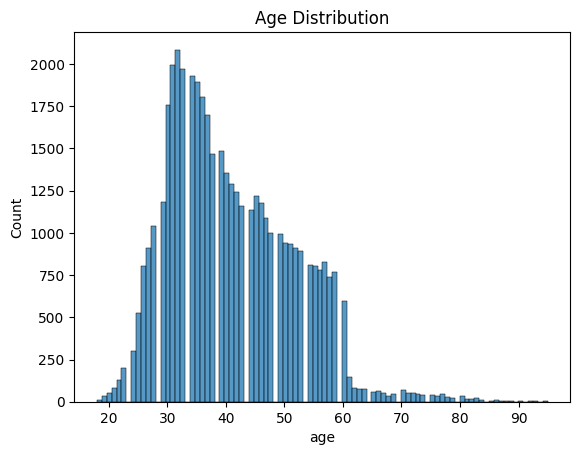

In [207]:
#histogram plot for age
import seaborn as sns
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()




This chart shows that the bank's clients are predominantly in their middle adult years, specifically ranging from their late 20s to their early 50s. The distribution is right-skewed.|

**2). Job**

The job variable indicates the type of job of the client. It is a categorical variable.

/tmp/ipython-input-208-1315708236.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job', data=df, order = df['job'].value_counts().index, palette='Reds_r')


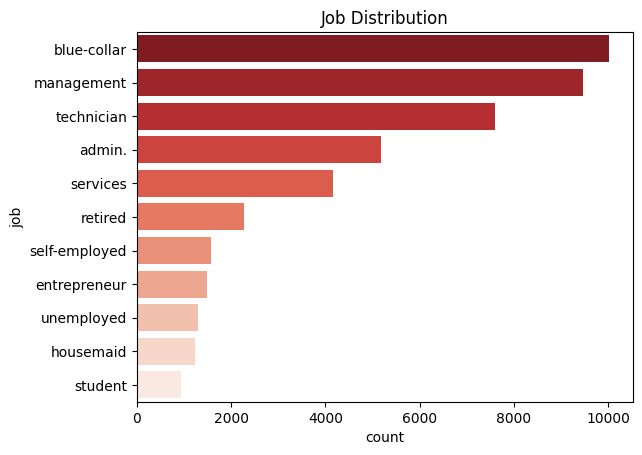

In [208]:
sns.countplot(y='job', data=df, order = df['job'].value_counts().index, palette='Reds_r')
plt.title('Job Distribution')
plt.show()

This bar chart reveals that Management, Blue-collar, Technician, and Admin roles are the most common among the bank's clients, highlighting the primary professional groups targeted by their marketing efforts

**3. Subscription**
The y variable is our target, indicating whether a client subscribed to a term deposit ('yes' or 'no'). It is a binary categorical variable


/tmp/ipython-input-209-228212518.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subscription', data=df, palette='Reds_r')


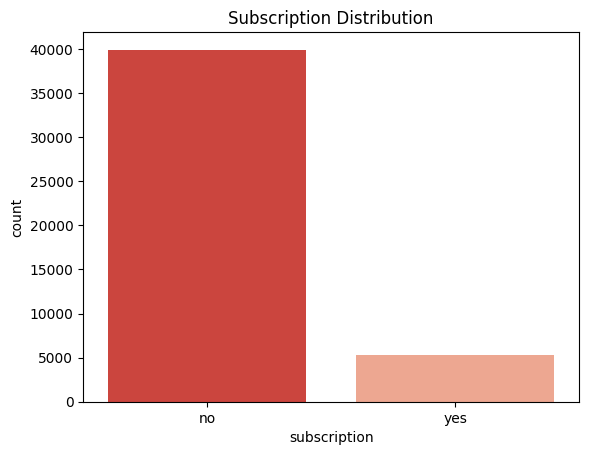

In [209]:
sns.countplot(x='subscription', data=df, palette='Reds_r')
plt.title('Subscription Distribution')
plt.show()

This bar chart, clearly shows the distribution of responses for the subscription variable. The count of clients who selected 'no' is significantly higher than those who selected 'yes'.

Analysis based on Subscribers

In [210]:
df[df["subscription"] == "yes"]

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month
83,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,failure,yes,5-may
86,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,failure,yes,5-may
87,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,failure,yes,5-may
129,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,failure,yes,5-may
168,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,failure,yes,5-may
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes,17-nov
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,failure,yes,17-nov
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,failure,yes,17-nov
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,failure,yes,17-nov


In [217]:
dataframe_new = df[df["subscription"] == "yes"].copy()
dataframe_new['age_group'] = df['age_group']
display(dataframe_new.head())

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month,age_group
83,59,admin.,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,failure,yes,5-may,Adult
86,56,admin.,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,failure,yes,5-may,Adult
87,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,failure,yes,5-may,Adult
129,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,failure,yes,5-may,Adult
168,54,admin.,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,failure,yes,5-may,Adult


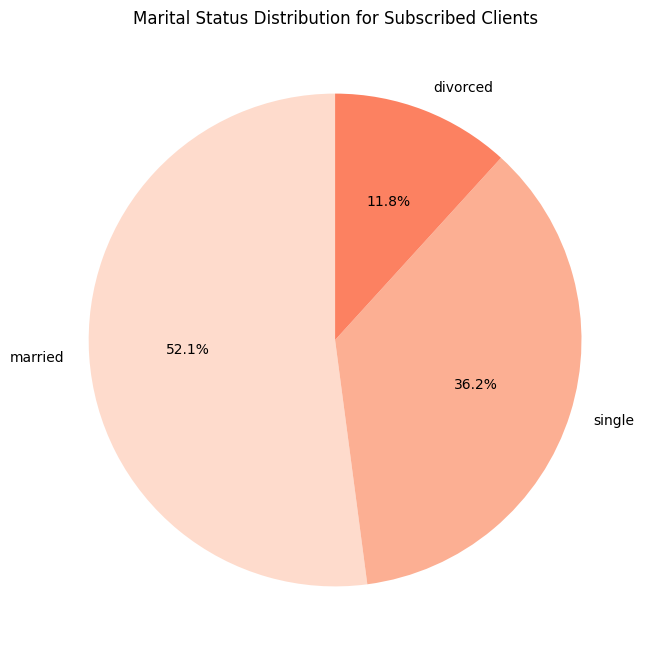

In [212]:
marital_counts = dataframe_new['marital'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))
plt.title('Marital Status Distribution for Subscribed Clients')
plt.show()

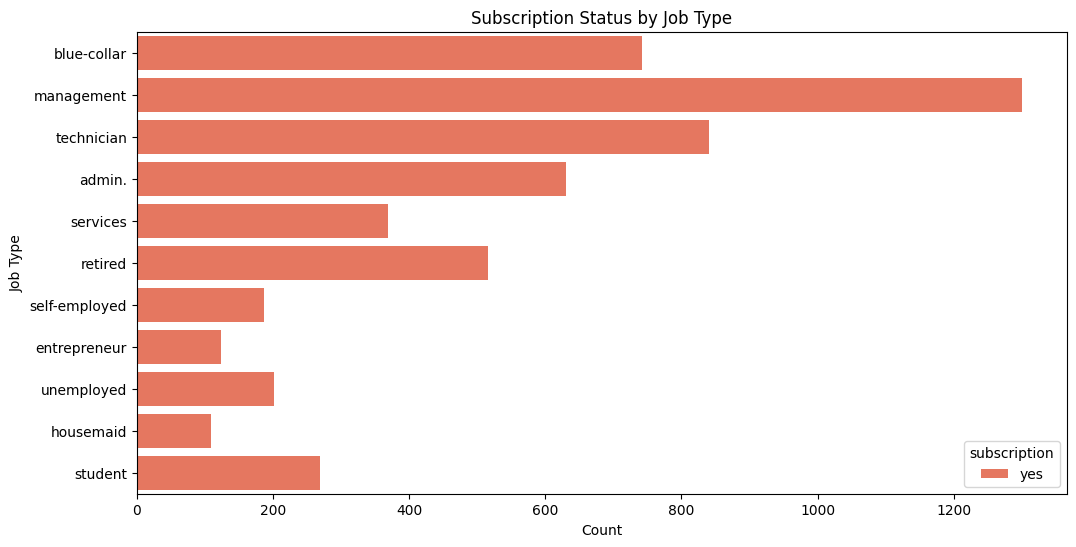

In [213]:
plt.figure(figsize=(12, 6))
sns.countplot(y='job', hue='subscription', data=dataframe_new, order = df['job'].value_counts().index, palette='Reds')
plt.title('Subscription Status by Job Type')
plt.xlabel('Count')
plt.ylabel('Job Type')
plt.show()

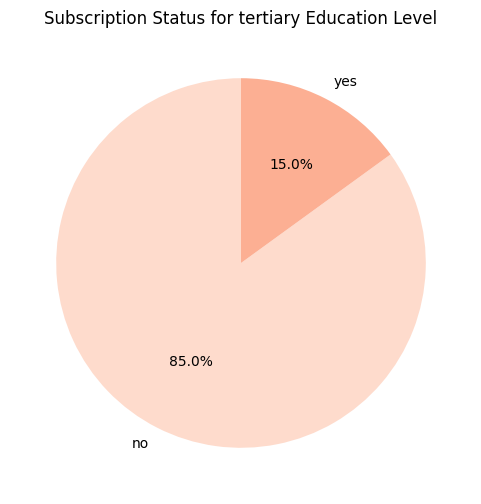

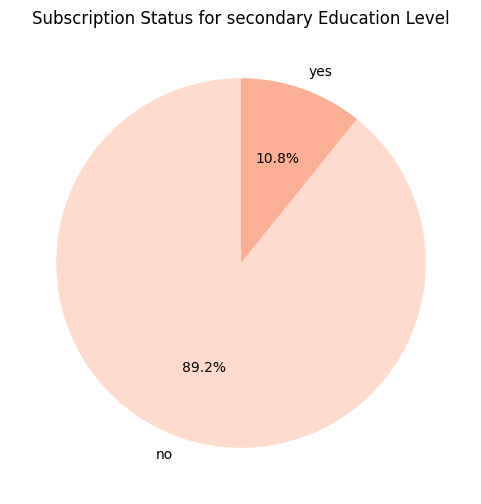

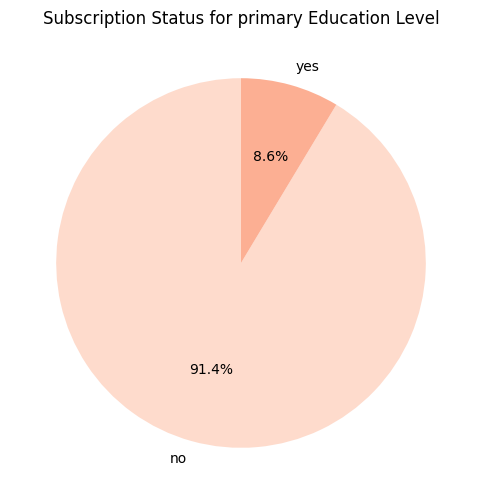

In [214]:
education_levels = df['education'].unique()

for level in education_levels:
    df_education = df[df['education'] == level]
    subscription_counts = df_education['subscription'].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))
    plt.title(f'Subscription Status for {level} Education Level')
    plt.show()

In [215]:

# Assuming 'Minor' is <18, 'Adult' is 18-64, 'Elderly Ones' is 65+
age_bins = [0, 18, 65, df['age'].max()]
age_labels = ['Minor', 'Adult', 'Elderly Ones']


df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,subscription,day_month,age_group
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no,5-may,Adult
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,failure,no,5-may,Adult
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,failure,no,5-may,Adult
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,failure,no,5-may,Adult
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,failure,no,5-may,Adult


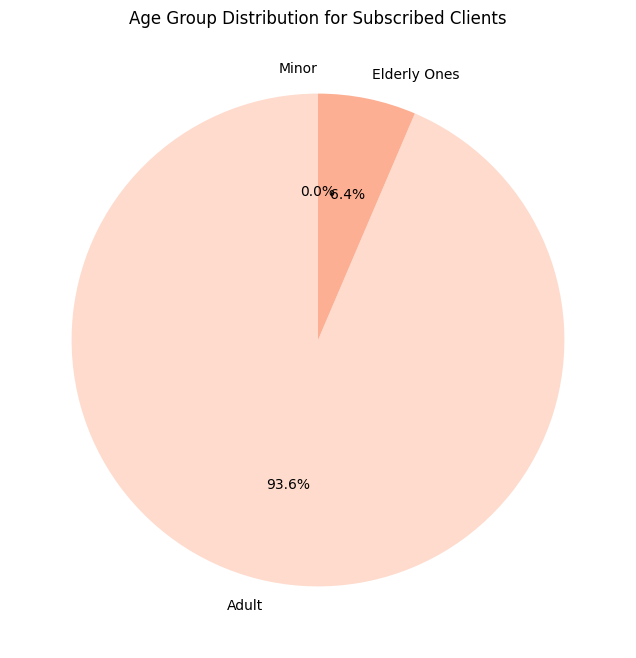

In [218]:
age_group_counts = dataframe_new['age_group'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'))
plt.title('Age Group Distribution for Subscribed Clients')
plt.show()

# Conclusion


Based on the initial exploratory data analysis of the bank marketing dataset, i observed several key trends:

**Data Loading and Wrangling:**

* The dataset was successfully loaded from the UCI Machine Learning Repository.
* Missing values in columns such as 'job', 'education', 'contact', and 'poutcome' were identified and handled, primarily by filling with the mode of the respective columns.
* A new column 'day_month' was created by combining 'day_of_week' and 'month'.
* A new column 'age_group'was created from 'age'.

**Exploratory Data Analysis (EDA):**

*   The distribution of client ages shows a concentration in the middle adult years (late 20s to early 50s), with a right-skew.
*   The most frequent job types among clients are Management, Blue-collar, Technician, and Admin roles.
*   The target variable 'subscription' is imbalanced, with a significantly higher number of clients not subscribing ('no') compared to those who subscribed ('yes').
*   Initial multivariate analysis on subscribed clients revealed that the majority fall within the 'Adult' age group and are married.
*   Preliminary looks at job types and education levels in relation to subscription suggest potential differences, but further analysis is needed for confirmation.

